<a href="https://colab.research.google.com/github/riddhipatel09/AI/blob/main/grouping-filtering-sorting-merging-decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = {
    'name': ['Karan', 'Isha', 'Vikram', 'Priya'],
    'age': [22, 21, 23, 22],
    'city': ['Pune', 'Delhi', 'Pune', 'Mumbai'],
    'science_score': [78, 85, 91, 88]
}

df = pd.DataFrame(data)
print(df.groupby(["city"]).mean(numeric_only=True))

         age  science_score
city                       
Delhi   21.0           85.0
Mumbai  22.0           88.0
Pune    22.5           84.5


In [ ]:
import numpy as np

arr = np.array([78, 85, 91, 88])

# Boolean indexing
x = arr[[True, False, True, False]]
print(x)

# Filter > 85
filter_arr = arr > 85
newarr = arr[filter_arr]
print(filter_arr)
print(newarr)

# Filter even numbers
filter_arr = arr % 2 == 0
newarr = arr[filter_arr]
print(filter_arr)
print(newarr)


[78 91]
[False False  True  True]
[91 88]
[ True False False  True]
[78 88]


In [ ]:
import numpy as np

# Sorting numbers
arr = np.array([78, 85, 91, 88])
print(np.sort(arr))

# Sorting strings
arr = np.array(['Karan', 'Isha', 'Vikram', 'Priya'])
print(np.sort(arr))

# Sorting booleans
arr = np.array([True, False, True])
print(np.sort(arr))

# Sorting 2D array
arr = np.array([[22, 21, 23, 22], [78, 85, 91, 88]])
print(np.sort(arr))


[78 85 88 91]
['Isha' 'Karan' 'Priya' 'Vikram']
[False  True  True]
[[21 22 22 23]
 [78 85 88 91]]


In [ ]:
import pandas as pd

data1 = {
    "name": ["Karan", "Isha", "Vikram"],
    "age": [22, 21, 23]
}

data2 = {
    "name": ["Karan", "Isha", "Vikram"],
    "attendance": [95, 88, 90]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

newdf = df1.merge(df2, how='right')
print(newdf)


     name  age  attendance
0   Karan   22          95
1    Isha   21          88
2  Vikram   23          90


First 5 rows of the dataset:
   weight_g  is_plastic  density  waste_type
0       120           1     0.90  recyclable
1        50           0     1.20     organic
2       200           0     0.80     organic
3        75           1     0.95  recyclable
4       300           1     1.10   hazardous

Simplified Decision Tree model trained successfully!

Accuracy of model: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Confusion Matrix:
 [[2]]

Sample Comparison:
    Predicted  Actual
0      False   False
1      False   False


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


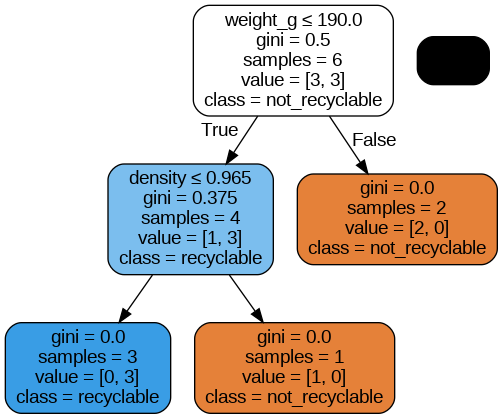

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from six import StringIO
from IPython.display import Image, display
import pydotplus

# Step 2: Load a waste dataset (simulated example with structured features)
# Here, we create a toy dataset—replace with your real features (e.g., color histograms, texture metrics)
data = {
    'weight_g': [120, 50, 200, 75, 300, 40, 180, 60],
    'is_plastic': [1, 0, 0, 1, 1, 0, 0, 1],
    'density': [0.9, 1.2, 0.8, 0.95, 1.1, 1.3, 0.85, 0.98],
    'waste_type': ['recyclable', 'organic', 'organic', 'recyclable',
                   'hazardous', 'organic', 'recyclable', 'organic']
}
df = pd.DataFrame(data)
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Preprocess data
df_encoded = pd.get_dummies(df, columns=['waste_type'], drop_first=False)
# e.g., columns: weight_g, is_plastic, density, waste_type_hazardous, waste_type_organic, waste_type_recyclable

# Features and target
# We'll predict one class—say, 'waste_type_recyclable'
X = df_encoded.drop(['waste_type_recyclable'], axis=1)
y = df_encoded['waste_type_recyclable']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Step 5: Train a simplified Decision Tree model
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)
print("\nSimplified Decision Tree model trained successfully!")

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("\nAccuracy of model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Compare predictions with actual values
compare_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test.values})
print("\nSample Comparison:\n", compare_df.head())

# Step 8: Visualize the decision tree
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                feature_names=X.columns,
                class_names=['not_recyclable','recyclable'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
if graph:
    display(Image(graph.create_png()))
else:
    print("Error in generating the decision tree graph.")
